In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

In [60]:
def dmu_idm_dr(T_rec, A_rec, z, case='recoupling', a_idm_dr=1, nindex_idm_dr=4, omega0_cdm=0.12038, f_idm_dr=1.0, h=0.67556, xi=0.3):
    """
    Calculate the comoving scattering rate for a given T_rec, A_rec, z.
    """
    base_rate = (a_idm_dr * ((1+z)/(1e7))**nindex_idm_dr * omega0_cdm*f_idm_dr * h**2)
    T_idr = 2.7255 * xi

    if case == 'recoupling':
        if T_rec > T_idr * (1+z):
            return base_rate * (1 + A_rec)
            
    return base_rate

def single_decoupling_z(a_idm_dr, nindex_idm_dr=4, omega0_cdm=0.12038, f_idm_dr=1.0, h=0.67556):
    """
    Calculate the redshift at which dmu_idm_dr = 1e-3 for a given a_idm_dr for single decoupling.
    """
    return -1 + ((10**(7*nindex_idm_dr - 3))/(a_idm_dr * f_idm_dr*h**2 * omega0_cdm))**(1/nindex_idm_dr)

In [61]:
#Load pk interpolations from pickle file
pk_sd_interp = pickle.load(open('interps/pks_sd_interp.p','rb'))
pk_dd_interp = pickle.load(open('interps/pks_dd_interp.p','rb'))

In [62]:
#range of k's for which pk interpolations are valid
pk_max = 1e2
kk = np.logspace(-4, np.log10(pk_max), 500)

N_points = 100
#Values over which dd interpolation is defined
T_rec_arr = np.logspace(5, 7, N_points)
A_rec_arr = np.logspace(-1, 3, N_points)

In [63]:
#plot interpolation between two scenarios
idx = 65

print('Showing interpolation between points with A_rec = %.2f, T_rec = %.2f and A_rec = %.2f, T_rec = %.2f' % (A_rec_arr[idx], T_rec_arr[idx], A_rec_arr[idx+1], T_rec_arr[idx+1]))

num_interps = 7
T_interps = np.logspace(np.log10(T_rec_arr[idx]), np.log10(T_rec_arr[idx+1]), num_interps)
A_interps = np.logspace(np.log10(A_rec_arr[idx]), np.log10(A_rec_arr[idx+1]), num_interps)

zs = np.logspace(5,8,1000)
dmus1 = [dmu_idm_dr(T_rec_arr[idx], A_rec_arr[idx], z) for z in zs] 
dmus2 = [dmu_idm_dr(T_rec_arr[idx+1], A_rec_arr[idx+1], z) for z in zs] 


Showing interpolation between points with A_rec = 42.29, T_rec = 2056512.31 and A_rec = 46.42, T_rec = 2154434.69


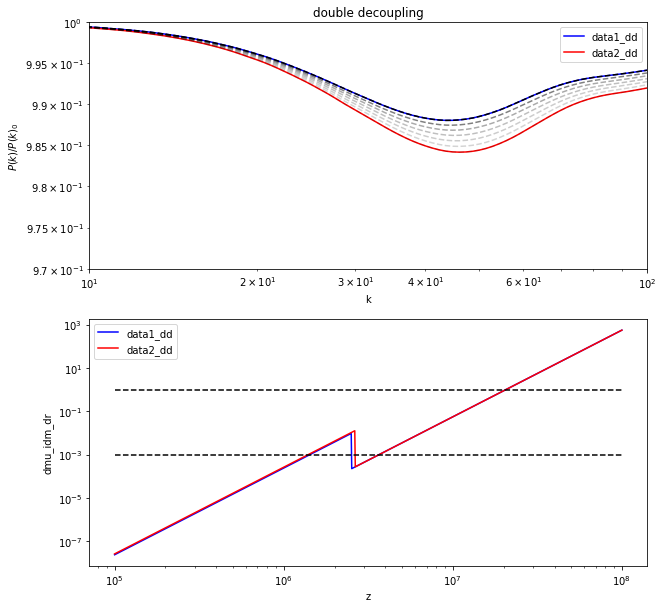

In [64]:
plt.figure(1, figsize=(10,10))
plt.subplot(211)
plt.plot(kk, pk_dd_interp((T_rec_arr[idx], A_rec_arr[idx], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'b', label='data1_dd')
plt.plot(kk, pk_dd_interp((T_rec_arr[idx+1], A_rec_arr[idx+1], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'r', label='data2_dd')
for num_interp in range(num_interps):
    plt.plot(kk, pk_dd_interp((T_interps[num_interp], A_interps[num_interp], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'--k', alpha=1/(num_interp+1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.ylim(0.97,1)
plt.xlabel('k')
plt.ylabel('$P(k)/P(k)_0$')
plt.legend()
plt.title('double decoupling')
plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('dmu_idm_dr')
plt.plot(zs, dmus1, 'b', label='data1_dd')
plt.plot(zs, dmus2, 'r', label='data2_dd')
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
plt.legend()
plt.show()

## Single Decoupling

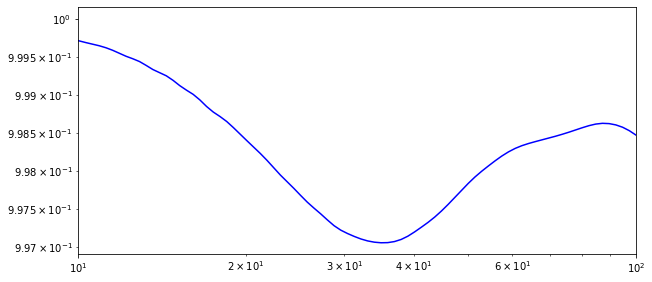

In [65]:
plt.figure(1, figsize=(10,10))
plt.subplot(211)
plt.plot(kk, pk_dd_interp((T_rec_arr[60], A_rec_arr[60], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'b', label='data1_dd')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.show()

In [66]:
N_points_a = 50
#Values over which sd interpolation is defined
a_idm_dr_arr = np.logspace(-5, 5, N_points_a)

In [67]:
idx_a = 30

print('Showing interpolation between points with a_idm_dr = %.2f (z_decoupling = %.2e) and a_idm_dr = %.2f (z_decoupling = %.2e)' % (a_idm_dr_arr[idx_a],single_decoupling_z(a_idm_dr_arr[idx_a]), a_idm_dr_arr[idx_a+1], single_decoupling_z(a_idm_dr_arr[idx_a+1])))

num_interps = 7
a_idm_dr_interps = np.logspace(np.log10(a_idm_dr_arr[idx_a]), np.log10(a_idm_dr_arr[idx_a+1]), num_interps)

Showing interpolation between points with a_idm_dr = 13.26 (z_decoupling = 1.92e+06) and a_idm_dr = 21.21 (z_decoupling = 1.71e+06)


In [68]:
#plot scattering rate for those two scenarios
zs = np.logspace(5,8,1000)
dmus1_sd = [dmu_idm_dr(None, None, z, a_idm_dr = a_idm_dr_arr[idx_a], case='no-rec') for z in zs] 
dmus2_sd = [dmu_idm_dr(None, None, z, a_idm_dr = a_idm_dr_arr[idx_a+1], case='no-rec') for z in zs] 


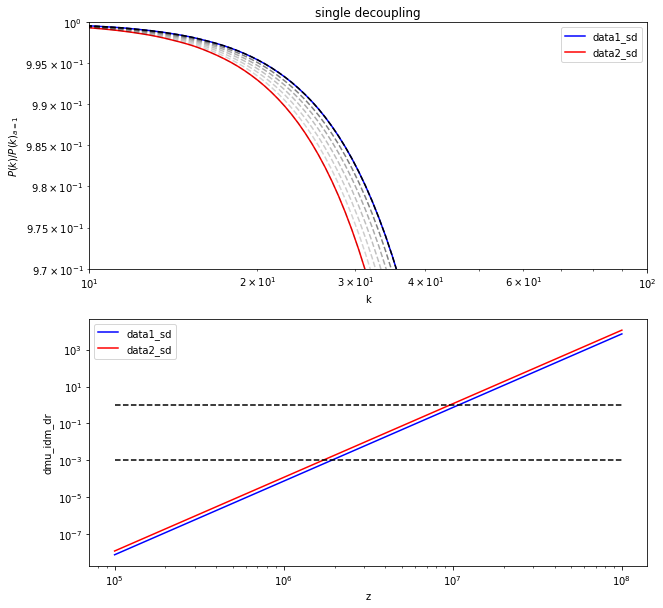

In [69]:
plt.figure(1, figsize=(10,10))
plt.subplot(211)
plt.plot(kk, pk_sd_interp((a_idm_dr_arr[idx_a], kk))/pk_sd_interp((1,kk)),'b', label='data1_sd')
plt.plot(kk, pk_sd_interp((a_idm_dr_arr[idx_a+1], kk))/pk_sd_interp((1,kk)),'r', label='data2_sd')
for num_interp in range(num_interps):
    plt.plot(kk, pk_sd_interp((a_idm_dr_interps[num_interp], kk))/pk_sd_interp((1,kk)),'--k', alpha=1/(num_interp+1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.ylim(0.97,1)
plt.xlabel('k')
plt.ylabel('$P(k)/P(k)_{a=1}$')
plt.legend()
plt.title('single decoupling')
plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('dmu_idm_dr')
plt.plot(zs, dmus1_sd, 'b', label='data1_sd')
plt.plot(zs, dmus2_sd, 'r', label='data2_sd')
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
plt.legend()
plt.show()

## Best fit sd vs dd cases

In [70]:
def best_sd_fit(T_rec, A_rec, a_idm_dr_arr):
    '''
    For a given double decoupling case, finds the best fit a_idm_dr for a single decoupling case using an l2 metric
    #currently ~4.5 secs. Can improve?
    '''
    l2best = np.inf
    l2best_a = 0
    for a in a_idm_dr_arr: #only searching over a_idm_dr values that were defined in the sd interpolation
        l2 = np.sum([(pk_dd_interp((T_rec, A_rec, k)) - pk_sd_interp((a, k)))**2 for k in kk[-200:]]) #Only look at highest k
        if l2 < l2best:
            l2best = l2
            l2best_a = a
    return l2best, l2best_a

In [71]:
#Scan over params
#? This could be very fast on the cluster. Worth doing though?
#todo: parallelize (see script)
T_rec_arr_test = T_rec_arr[50:]
A_rec_arr_test = A_rec_arr[50:]

l2_best_arr = np.zeros((len(T_rec_arr_test), len(A_rec_arr_test)))
best_a_arr = np.zeros((len(T_rec_arr_test), len(A_rec_arr_test)))

for i, T_rec in enumerate(T_rec_arr_test):
    for j, A_rec in enumerate(A_rec_arr_test):
        l2_best_arr[i,j], best_a_arr[i,j] = best_sd_fit(T_rec, A_rec, a_idm_dr_arr)


In [72]:
TT, AA = np.meshgrid(T_rec_arr_test, A_rec_arr_test)

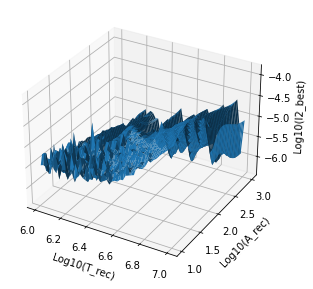

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(TT), np.log10(AA), np.log10(l2_best_arr))
ax.set_xlabel('Log10(T_rec)')
ax.set_ylabel('Log10(A_rec)')
ax.set_zlabel('Log10(l2_best)')

fig.tight_layout()
plt.show()

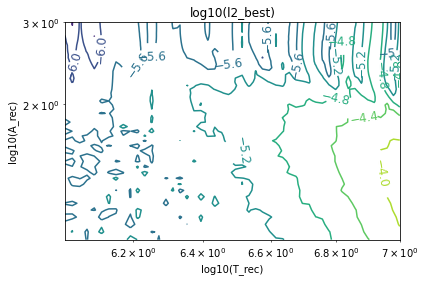

In [74]:
fig, ax = plt.subplots()
CS = ax.contour(np.log10(T_rec_arr_test), np.log10(A_rec_arr_test), np.log10(l2_best_arr))
ax.clabel(CS, inline=True, fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log10(T_rec)')
ax.set_ylabel('log10(A_rec)')
ax.set_title('log10(l2_best)')
plt.show()

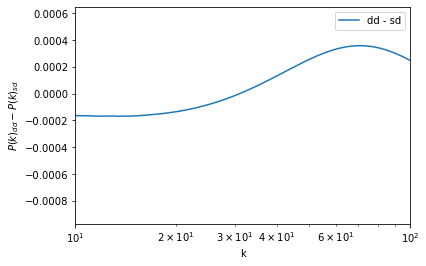

In [75]:
idx_test = 28
plt.plot(kk[-200:], (pk_dd_interp((T_rec_arr_test[idx_test], A_rec_arr_test[idx_test], kk[-200:])) - pk_sd_interp((best_a_arr[idx_test, idx_test], kk[-200:]))), label='dd - sd')
plt.xscale('log')
plt.xlim(1e1,1e2)
plt.xlabel('k')
plt.ylabel('$P(k)_{dd} - P(k)_{sd}$')
plt.legend()
plt.show()

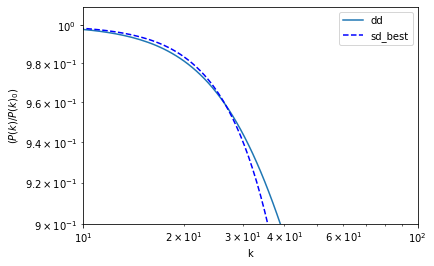

In [76]:
idx_test = 25
plt.plot(kk[-200:], pk_dd_interp((T_rec_arr_test[idx_test], A_rec_arr_test[idx_test], kk[-200:]))/pk_sd_interp((a_idm_dr_arr[0], kk[-200:])), label='dd')
# plt.plot(kk, pk_sd_interp((a_idm_dr_arr[l2best_idx_a], kk))/pk_sd_interp((a_idm_dr_arr[0], kk)),'b--', label='sd_best')
plt.plot(kk[-200:], pk_sd_interp((best_a_arr[idx_test, idx_test], kk[-200:]))/pk_sd_interp((a_idm_dr_arr[0], kk[-200:])),'b--', label='sd_best')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('$(P(k)/ P(k)_0)$')
plt.ylim(0.9,1.01)
plt.xlim(1e1,1e2)
plt.legend()
plt.show()

## Load and plot BOSS + DESY1 data

In [77]:
dfDES = pd.read_csv("DESY1.csv")

In [251]:
dfDES = dfDES.assign(ylow = dfDES["Y"] - dfDES["-DeltaY"], yhigh = dfDES["+DeltaY"] - dfDES["Y"])
dfDES = dfDES.assign(xlow = dfDES["X"] - dfDES["-DeltaX"], xhigh = dfDES["+DeltaX"] - dfDES["X"])
yerrDES = np.array([dfDES["ylow"], dfDES['yhigh']])
xerrDES = np.array([dfDES["xlow"], dfDES['xhigh']])

yerrDESdimless = np.array([dfDES["ylow"]*(dfDES['X']**3)/(2*(np.pi**2)), dfDES['yhigh']*(dfDES['X']**3)/(2*(np.pi**2))])

In [232]:
columns = ["k", "P(k)", "delta P(k)+", "delta P(k)-"]
dfBOSS = pd.read_csv("BOSS.csv", header=None)
dfBOSS.columns = columns
# yerr = np.array([dfBOSS["delta P(k)-"], dfBOSS['delta P(k)+']])

In [250]:
dfBOSS= dfBOSS.assign(ylow = dfBOSS["P(k)"] - dfBOSS["delta P(k)-"], yhigh = dfBOSS["delta P(k)+"] - dfBOSS["P(k)"])
yerrBOSS = np.array([dfBOSS["ylow"], dfBOSS['yhigh']])

yerrBOSSdimless = np.array([dfBOSS["ylow"]*(dfBOSS['k']**3)/(2*(np.pi**2)), dfBOSS['yhigh']*(dfBOSS['k']**3)/(2*(np.pi**2))])

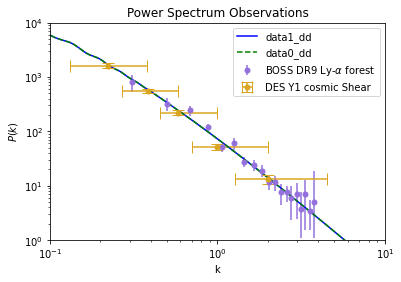

In [252]:
plot_idx=90
plt.plot(kk, pk_dd_interp((T_rec_arr[plot_idx], A_rec_arr[plot_idx], kk)),'b', label='data1_dd')
plt.plot(kk, pk_dd_interp((T_rec_arr[0], A_rec_arr[0], kk)),'g--', label='data0_dd')
plt.errorbar(dfBOSS['k'], dfBOSS['P(k)'], yerr=yerrBOSS, marker='o', ms=5, color='mediumpurple', ls='none', label=r'BOSS DR9 Ly-$\alpha$ forest')
plt.errorbar(dfDES['X'], dfDES['Y'], yerr=yerrDES, xerr=xerrDES, marker='o', ms=5, color='goldenrod', ls='none', capsize=6, label='DES Y1 cosmic Shear')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,10)
# plt.xlim(10,100)
plt.ylim(1e0,1e4)
plt.xlabel('k')
plt.ylabel('$P(k)$')
plt.title('Power Spectrum Observations')
plt.legend()
plt.show()

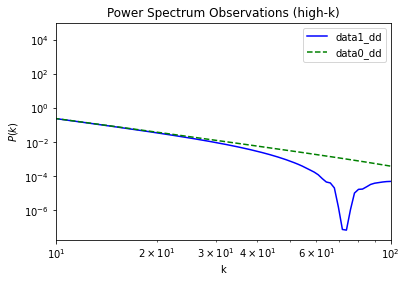

In [253]:
plot_idx=90
plt.plot(kk, pk_dd_interp((T_rec_arr[plot_idx], A_rec_arr[plot_idx], kk)),'b', label='data1_dd')
plt.plot(kk, pk_dd_interp((T_rec_arr[0], A_rec_arr[0], kk)),'g--', label='data0_dd')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0.1,10)
plt.xlim(10,100)
# plt.ylim(1e0,1e4)
plt.xlabel('k')
plt.ylabel('$P(k)$')
plt.title('Power Spectrum Observations (high-k)')
plt.legend()
plt.show()

## Projected Observations

In [130]:
dfHERA = pd.read_csv("HeraProjected.csv")
dfEDGES = pd.read_csv("EDGESProjected.csv")

In [151]:
dfHERA = dfHERA.assign(ylow = dfHERA["Y"] - dfHERA["-DeltaY"], yhigh = dfHERA["+DeltaY"] - dfHERA["Y"])
dfHERA = dfHERA.assign(xlow = dfHERA["X"] - dfHERA["-DeltaX"], xhigh = dfHERA["+DeltaX"] - dfHERA["X"])
yerrHERA = np.array([dfHERA["ylow"], dfHERA['yhigh']])
xerrHERA = np.array([dfHERA["xlow"], dfHERA['xhigh']])

In [132]:
dfEDGES = dfEDGES.assign(ylow = dfEDGES["Y"] - dfEDGES["-DeltaY"], yhigh = dfEDGES["+DeltaY"] - dfEDGES["Y"])
dfEDGES = dfEDGES.assign(xlow = dfEDGES["X"] - dfEDGES["-DeltaX"], xhigh = dfEDGES["+DeltaX"] - dfEDGES["X"])
yerrEDGES = np.array([dfEDGES["ylow"], dfEDGES['yhigh']])
xerrEDGES = np.array([dfEDGES["xlow"], dfEDGES['xhigh']])

In [247]:
#Go from dimensionless to physical power spectrum
yerrHERAdim = np.array([dfHERA["ylow"]*2*(np.pi**2)/(dfHERA['X']**3), dfHERA['yhigh']*2*np.pi/(dfHERA['X']**3)])
yerrEDGESdim = np.array([dfEDGES["ylow"]*2*(np.pi**2)/(dfEDGES['X']**3), dfEDGES['yhigh']*2*np.pi/(dfEDGES['X']**3)])

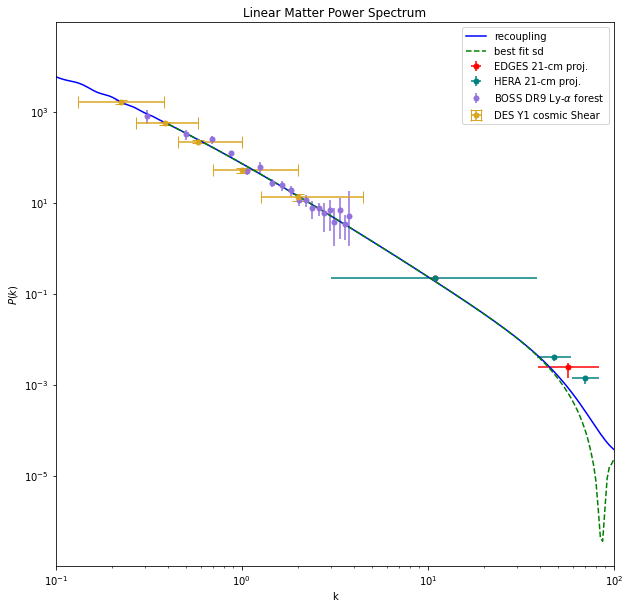

In [254]:
plot_idx=83
plt.figure(figsize=(10,10))
plt.errorbar(dfEDGES['X'], dfEDGES['Y']*2*(np.pi**2)/dfEDGES['X']**3, xerr=xerrEDGES, yerr=yerrEDGESdim,marker='o', ms=5, color='r', ls='none', label=r'EDGES 21-cm proj.')
plt.errorbar(dfHERA['X'], dfHERA['Y']*2*(np.pi**2)/dfHERA['X']**3, xerr=xerrHERA, yerr=yerrHERAdim, marker='o', ms=5, color='teal', ls='none', label=r'HERA 21-cm proj.')
plt.errorbar(dfBOSS['k'], dfBOSS['P(k)'], yerr=yerrBOSS, marker='o', ms=5, color='mediumpurple', ls='none', label=r'BOSS DR9 Ly-$\alpha$ forest')
plt.errorbar(dfDES['X'], dfDES['Y'], yerr=yerrDES, xerr=xerrDES, marker='o', ms=5, color='goldenrod', ls='none', capsize=6, label='DES Y1 cosmic Shear')

plt.plot(kk, pk_dd_interp((T_rec_arr[plot_idx], A_rec_arr[plot_idx], kk)),'b', label='recoupling')
plt.plot(kk[-200:], pk_sd_interp((best_a_arr[plot_idx-50, plot_idx-50], kk[-200:])),'g--', label='best fit sd') #only used highest 50 indices for best fit
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('k')
plt.ylabel('$P(k)$')
plt.title('Linear Matter Power Spectrum')
plt.xlim(0.1,100)
plt.show()

In [ ]:
#SM case 
#Use dimensionless power spectrum
#later decouplings
#Add warm DM curve
#Sketch notes on CLASS implementation

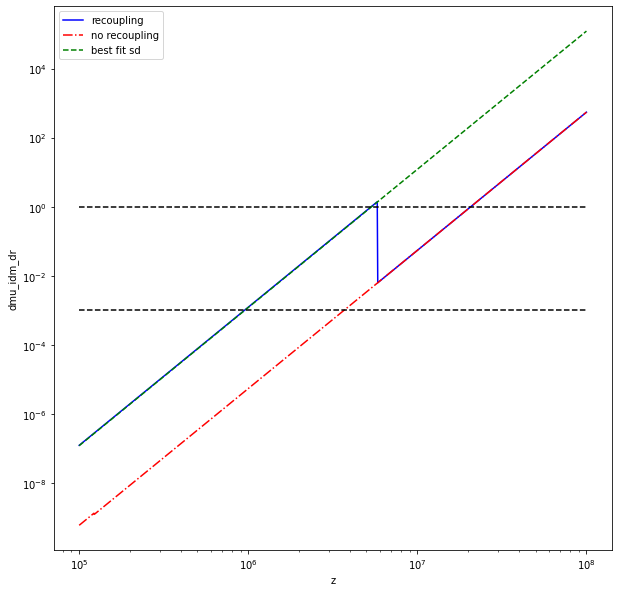

In [216]:
zs = np.logspace(5,8,1000)
dmus = [dmu_idm_dr(T_rec_arr[plot_idx], A_rec_arr[plot_idx], z) for z in zs] 
dmusnorec = [dmu_idm_dr(T_rec_arr[0], A_rec_arr[0], z) for z in zs]
dmusbestfitsd = [dmu_idm_dr(None, None, z, a_idm_dr=best_a_arr[plot_idx-50, plot_idx-50], case='no_rec') for z in zs]


plt.figure(1, figsize=(10,10))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('dmu_idm_dr')
plt.plot(zs, dmus, 'b', label='recoupling')
plt.plot(zs, dmusnorec, 'r-.', label='no recoupling')
plt.plot(zs, dmusbestfitsd, 'g--', label='best fit sd')
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
# plt.ylim(1e-2,1e0)
# plt.xlim(2e6,5e6)
plt.legend()
plt.show()

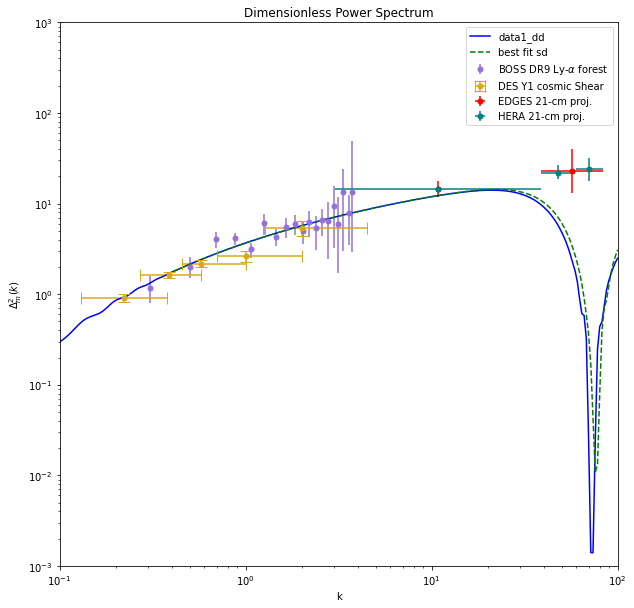

In [261]:
plot_idx=90

plt.figure(figsize=(10,10))

plt.plot(kk, pk_dd_interp((T_rec_arr[plot_idx], A_rec_arr[plot_idx], kk))*(kk**3)/(2*np.pi**2),'b', label='data1_dd')
plt.plot(kk[-200:], pk_sd_interp((best_a_arr[plot_idx-50, plot_idx-50], kk[-200:]))*(kk[-200:]**3)/(2*np.pi**2),'g--', label='best fit sd')

plt.errorbar(dfBOSS['k'], dfBOSS['P(k)']*(dfBOSS['k'])**3/(2*np.pi**2), yerr=yerrBOSSdimless, marker='o', ms=5, color='mediumpurple', ls='none', label=r'BOSS DR9 Ly-$\alpha$ forest')
plt.errorbar(dfDES['X'], dfDES['Y']*(dfDES['X']**3)/(2*np.pi**2), yerr=yerrDESdimless, xerr=xerrDES, marker='o', ms=5, color='goldenrod', ls='none', capsize=6, label='DES Y1 cosmic Shear')

#No conversion because these are already dimensionless
plt.errorbar(dfEDGES['X'], dfEDGES['Y'], xerr=xerrEDGES, yerr=yerrEDGES,marker='o', ms=5, color='r', ls='none', label=r'EDGES 21-cm proj.')
plt.errorbar(dfHERA['X'], dfHERA['Y'], xerr=xerrHERA, yerr=yerrHERA, marker='o', ms=5, color='teal', ls='none', label=r'HERA 21-cm proj.')

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,100)
# plt.xlim(10,100)
plt.ylim(1e-3,1e3)
plt.xlabel('k')
plt.ylabel('$\Delta^2_m(k)$')
plt.title('Dimensionless Power Spectrum')
plt.legend()
plt.show()